# Gaussian Process Regression

In [171]:
import numpy as np
import matplotlib.pyplot as plt

## Generate Training and Test Data

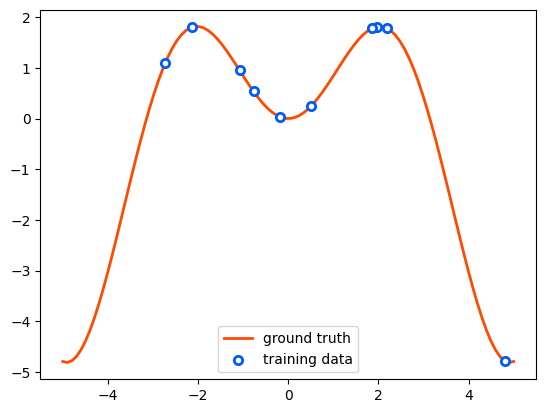

In [172]:
# generate training data and test data for regression

# ground truth function
def ground_truth_func(x: np.ndarray) -> np.ndarray:
    return x * np.sin(x)

## settings
dim_x = 1 # dimension of input data
min_x, max_x = -5.0, +5.0
train_data_size = 10
test_data_size = 100

## generate data
np.random.seed(123)
X_train = np.random.uniform(min_x, max_x, train_data_size).reshape(-1, dim_x)
y_train = ground_truth_func(X_train)
X_test = np.linspace(min_x, max_x, test_data_size).reshape(-1, dim_x)
y_test = ground_truth_func(X_test)

## plot
plt.plot(X_test, y_test, color="#FF4B00", linewidth=2, zorder=1, label="ground truth") # orange line
plt.scatter(X_train, y_train, fc="white", ec="#005AFF", linewidth=2, zorder=2, label="training data") # blue points
plt.legend()
plt.show()


## Define Kernel Function

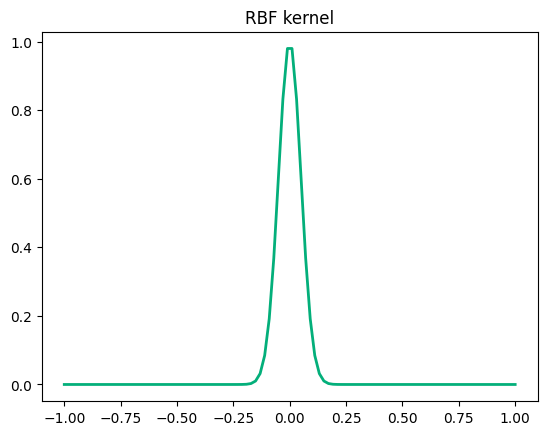

In [173]:
# define kernel function
def rbf_kernel(x_i: np.ndarray, x_j: np.ndarray) -> float:
    theta_1 = 1.0
    theta_2 = 0.5
    return theta_1 * np.exp(-1.0 * np.linalg.norm(x_i - x_j, ord=2) ** 2 / theta_2)

# plot kernel function
x = np.linspace(-1.0, 1.0, 100)
x_bar = np.zeros(x.shape)
y = [rbf_kernel(np.array([x_i]), np.array([x_bar])) for x_i in x]
plt.title("RBF kernel")
plt.plot(x, y, color="#03AF7A", linewidth=2)
plt.show()


## Execute Gaussian Process Regression

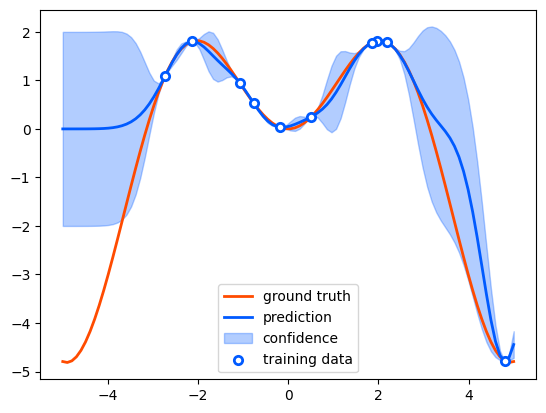

In [176]:
class GaussianProcessRegression:
    def __init__(self, kernel):
        self.kernel = kernel

    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        # get matrix size
        train_data_size = X_train.shape[0]
        dim_x = X_train.shape[1]

        # calculate kernel matrix K (train_data_size x train_data_size)
        K = np.zeros((train_data_size, train_data_size))
        for r in range(train_data_size):
            for c in range(train_data_size):
                K[r, c] = self.kernel(X_train[r], X_train[c])

        # calculate expanded kernel matrix K_big (train_data_size x test_data_size)        
        K_big = np.zeros((train_data_size, test_data_size))
        for r in range(train_data_size):
            for c in range(test_data_size):
                K_big[r, c] = self.kernel(X_train[r], X_test[c])

        # calculate mean and variance
        s = self.kernel(X_test, X_test)
        yy = np.linalg.inv(K) @ y_train
        y_pred = K_big.T @ yy
        y_var = s - np.diag(K_big.T @ np.linalg.inv(K) @ K_big)

        return y_pred.reshape(-1, dim_x), y_var.reshape(-1, dim_x)

    def optimize(self):
        # TODO: optimize hyperparameters
        pass

# instanciate the GPR class
gpr = GaussianProcessRegression(kernel=rbf_kernel)

# fit the model
y_pred, y_var = gpr.fit(X_train, y_train)

# plot the result
plt.plot(X_test, y_test, color="#FF4B00", linewidth=2, zorder=1, label="ground truth") # orange line
plt.plot(X_test, y_pred, color="#005AFF", linewidth=2, zorder=2, label="prediction") # blue line
plt.fill_between(X_test[:,0], (y_pred - 2.0*y_var)[:,0], (y_pred + 2.0*y_var)[:,0], color="#005AFF", alpha=0.3, zorder=0, label="confidence") # blue area
plt.scatter(X_train, y_train, fc="white", ec="#005AFF", linewidth=2, zorder=3, label="training data") # blue points
plt.legend()
plt.show()